# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
from collections import Counter
# Data split
from sklearn.model_selection import StratifiedKFold

# Preprocessing
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Custom Transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from feature_engine.encoding import RareLabelEncoder

# Custom Classifier
from imblearn import FunctionSampler
from sklearn.experimental import enable_halving_search_cv
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_array, check_is_fitted
from imblearn.pipeline import Pipeline
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.ensemble import BaggingClassifier

# Pipeline
from imblearn.pipeline import Pipeline

# Metrics 
from sklearn.metrics import brier_score_loss, roc_curve, precision_recall_curve 
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report

# Feature Enginering
from sklearn.inspection import permutation_importance
import shap

from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
from sklearn import set_config
set_config(display="diagram")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings(action='ignore', category=FitFailedWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# Exploratory Data Analysis(EDA)

- Analysis of the features.

- Finding any relations or trends considering multiple features.

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Text(0.5, 1.0, 'Survived')

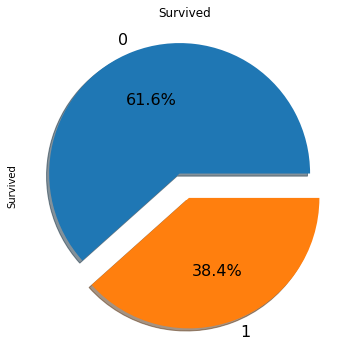

In [4]:
plt.figure(figsize=(6,6))
df.Survived.value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Survived")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
##From https://www.kaggle.com/code/arootda/pycaret-visualization-optimization-0-81/notebook
from IPython.core.display import HTML

def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

multi_table([pd.DataFrame(df[i].value_counts()) for i in df.columns if i != 'Your ad could be here'])

,PassengerId
1,1
599,1
588,1
589,1
590,1
...,...
301,1
302,1
303,1
304,1


### Missing data

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. [https://en.wikipedia.org/wiki/Missing_data]

In [8]:
# from https://cjasn.asnjournals.org/content/early/2014/02/06/CJN.10141013?versioned=true
from IPython.display import Image
Image(url = 'https://cjasn.asnjournals.org/content/clinjasn/early/2014/02/06/CJN.10141013/F2.large.jpg?width=800&height=600&carousel=1', width=700)

- Missing Completely at Random (MCAR)

The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

- Missing at Random (MAR)

MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

- Missing Not at Random (MNAR)

Missingness depends on unobserved data or the value of the missing data itself.

Wikipedia: https://en.wikipedia.org/wiki/Missing_data

Good guide

source: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python


#### Search null

In [9]:
def null_detector(df):
    # number of all null values in dataframe columns
    
    print(f'number of all null values in df columns')

    print("\n"f'{df.isnull().sum()}')

    # Nullity matrix to find null value in dataframe
    plt.figure(figsize=(15,10))
    sns.heatmap(df.isnull(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
    plt.show()

Use the missingno package to visualize the missingness of the data in a few different ways

<AxesSubplot:>

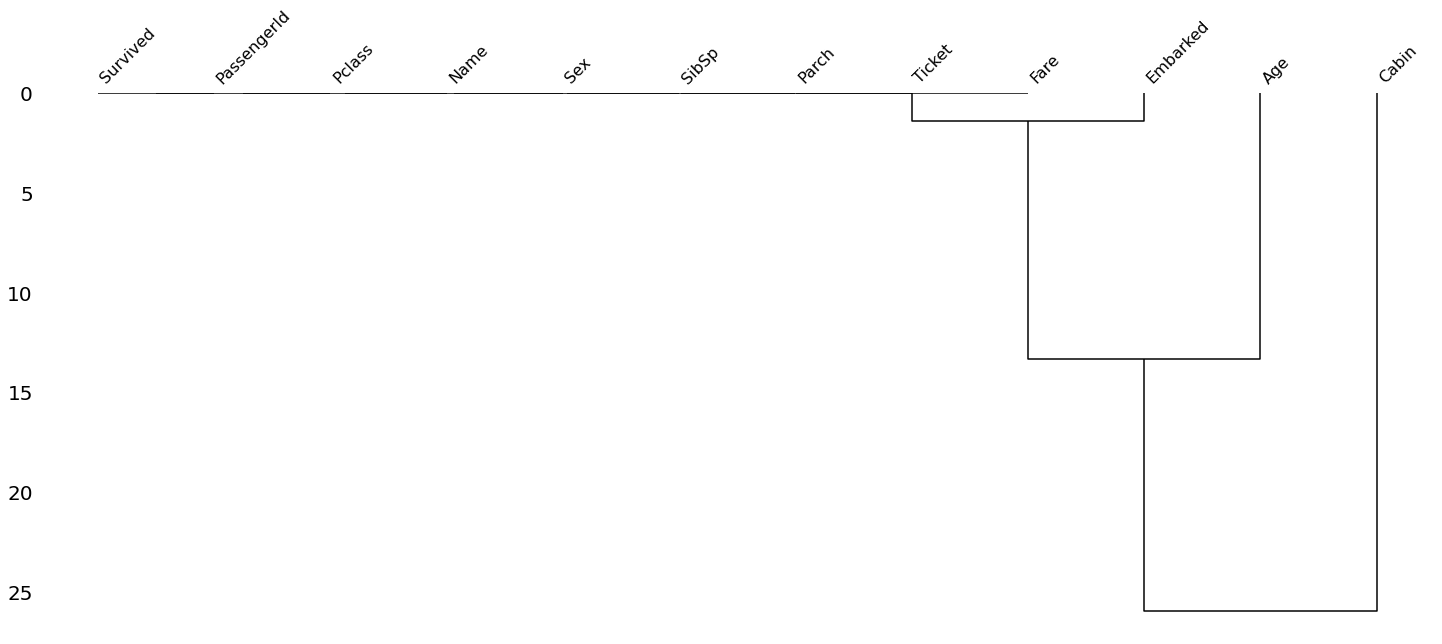

In [10]:
import missingno as msno
missing_df = df.copy()
n_data_points = missing_df.shape[0] * missing_df.shape[1]
n_missing = int(0.10 * n_data_points)
msno.dendrogram(missing_df)

number of all null values in df columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


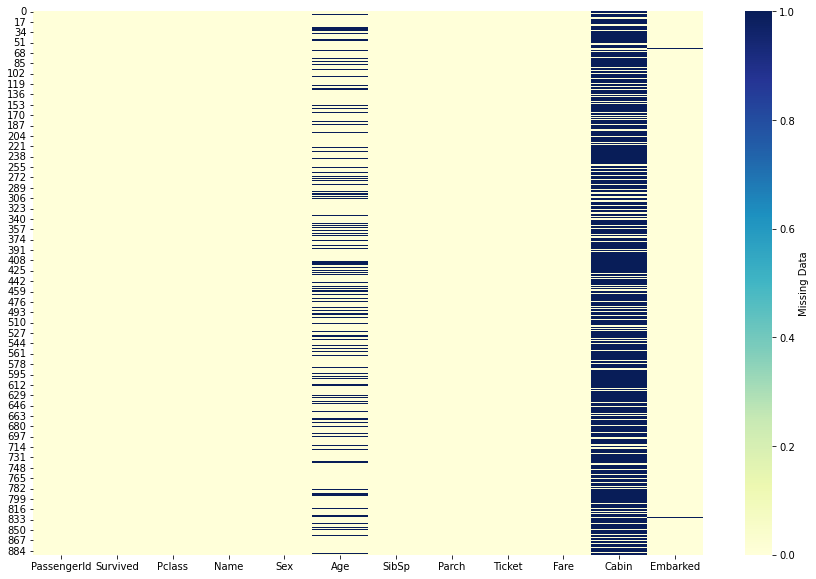

number of all null values in df columns

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


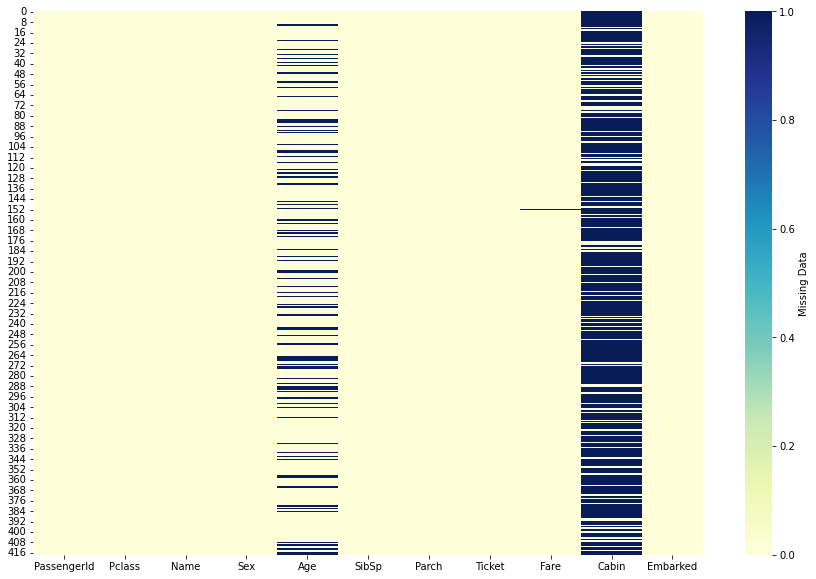

In [11]:
null_detector(df)
null_detector(test)

In [12]:
# drop duplicats
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

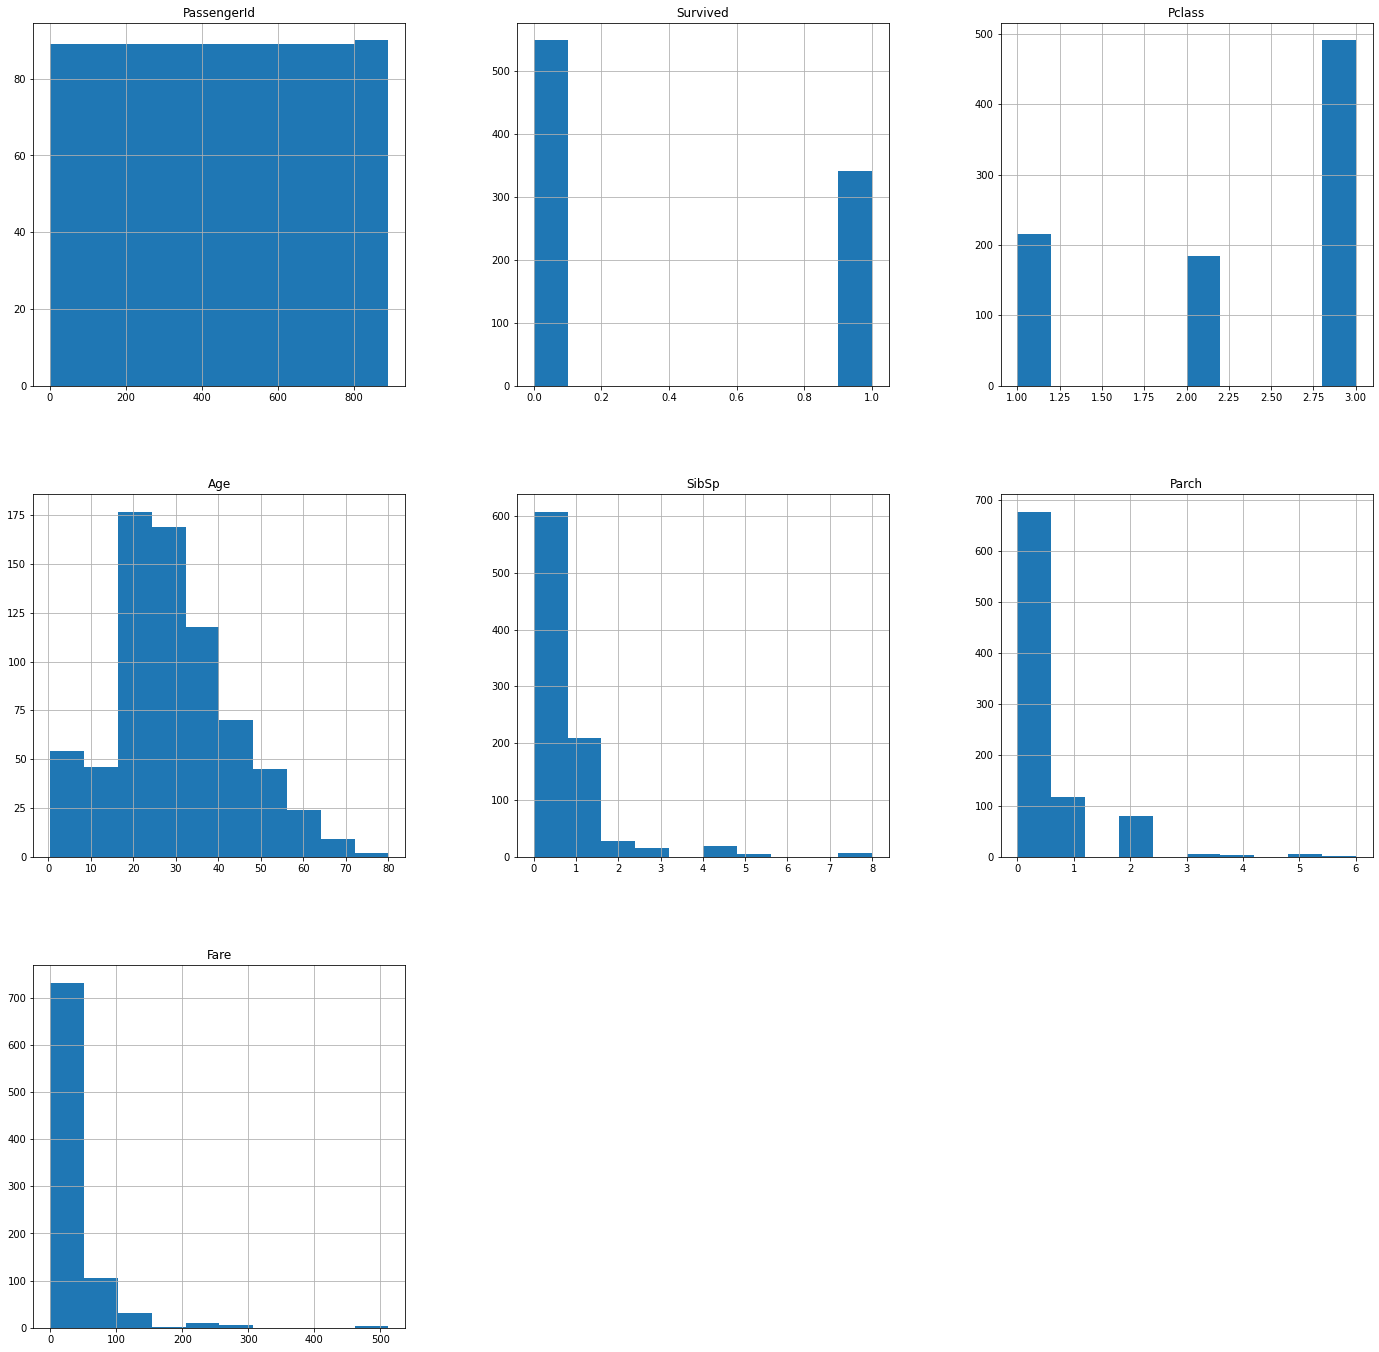

In [15]:
df[df.dtypes[(df.dtypes == "float64") |
             (df.dtypes == "int64")].index.values].hist(figsize=[24, 24])

### Correlation map

<AxesSubplot:>

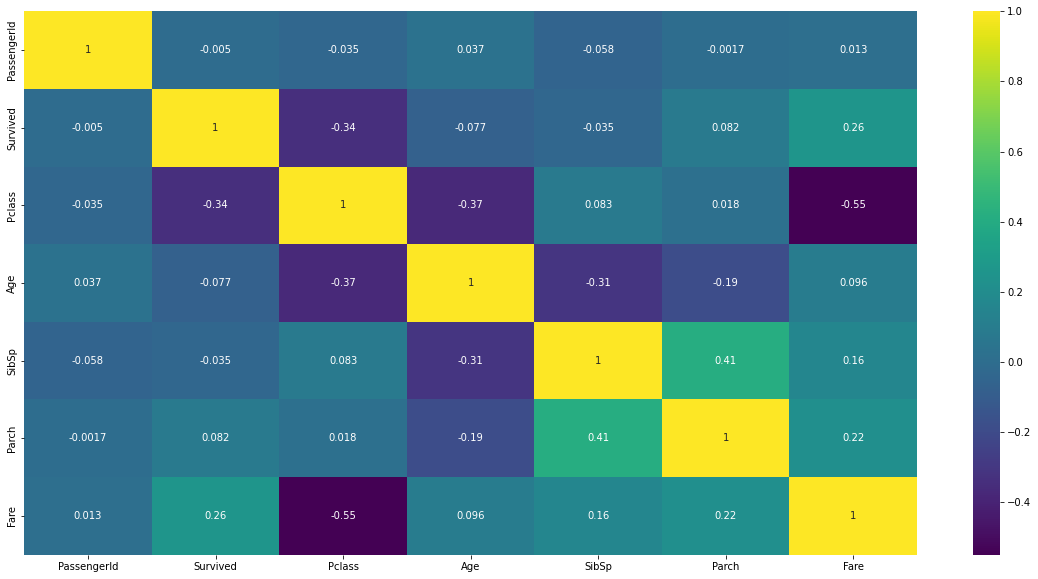

In [16]:
# Pearson correlation map
cols = df.corr().index
cm = df[cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, cmap='viridis')

In statistics, correlation or dependence is any statistical relationship between two variables. "correlation" may indicate any type of association, in statistics it refers to the degree to which a pair of variables are linearly related. We can only measure the numerical features.
The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement.

The two main types of correlation:
- positive correlation and
- negative correlation.

Positive correlation: A value 1.0 means perfect positive correlation, it's mean that increase in this feature lead in increase in another feature. i.e if we have features A, B and if feature A leads to increase in feature B, then they are positive correlated. If a value -1 that mean positive correlation

Negative correlation: A value -1.0 means perfect negative correlation, it's mean that decrease in this feature lead in increase in another feature. i.e if we have features A, B and if feature A leads to decrease in feature B, then they are negatively correlated. If a value -1 that mean negative correlation

If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.
A value 0.7 to 1 are strong positive correlation or perfectly correlated, so the increase in one leads to increase in the other
Generally speaking, a Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity. So we looking for correlation <0.7. A value -0.7 to -1 also strong negative correlation or negative correlated indicates the presence of multi-collinearity.
This means that both the features are containing highly similar information is known as MultiColinearity when both of them contains almost the same information.

Also, a correlation near 0 may also be relevant, but it may be different from the correlation.

Pearson correlation
- The Pearson product-moment correlation coefficient (or Pearson correlation coefficient, for short) is a measure of the strength of a linear association between two variables and is denoted by r. Basically, a Pearson product-moment correlation attempts to draw a line of best fit through the data of two variables, and the Pearson correlation coefficient, r, indicates how far away all these data points are to this line of best fit (i.e., how well the data points fit this new model/line of best fit).

source:https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php


Kendall correlation
- It is a measure of rank correlation: the similarity of the orderings of the data when ranked by each of the quantities.

source:https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient

Spearman correlation
- The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables.

source:https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php


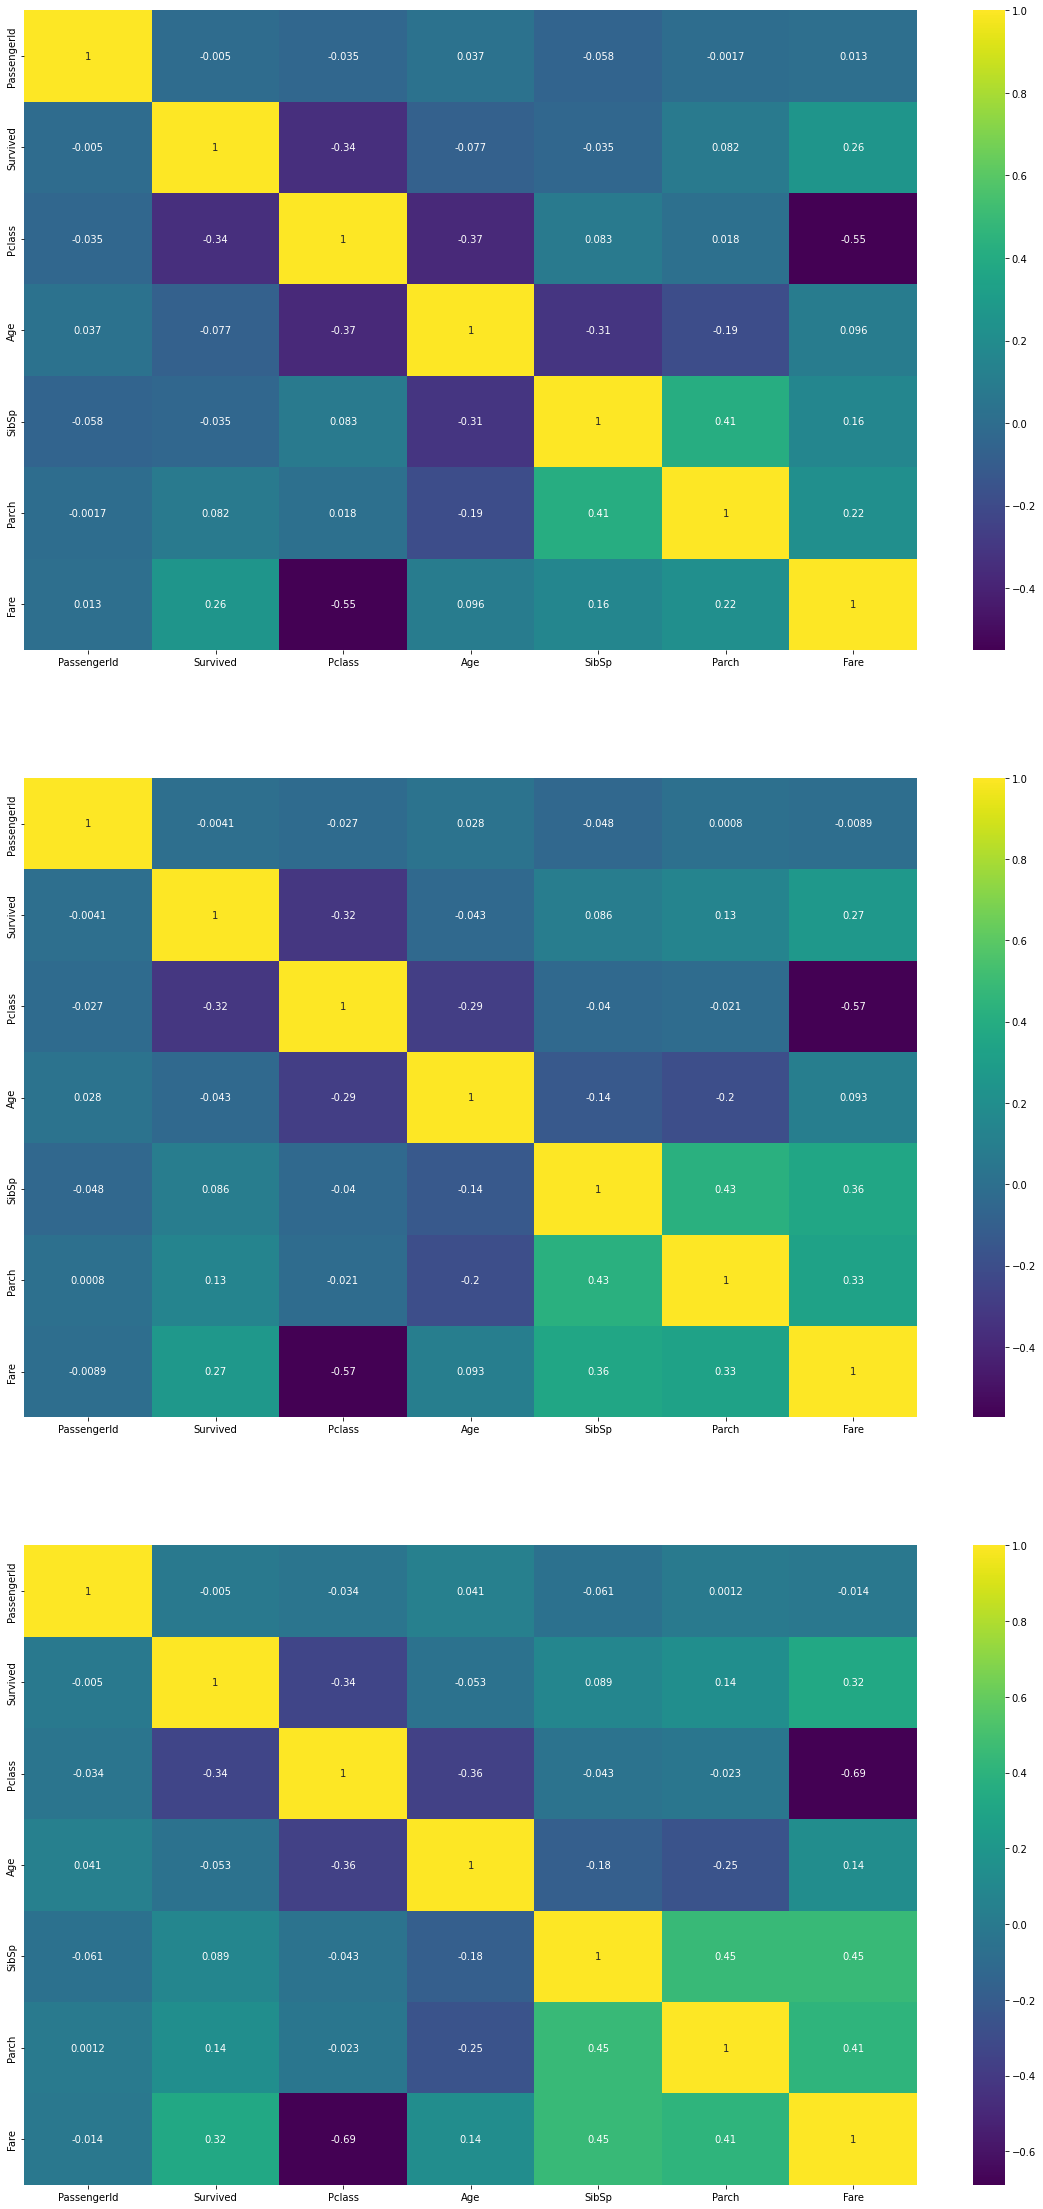

In [17]:
def correlation_map(df):
    fig, axs = plt.subplots(nrows=3, figsize=(20, 40))
    cols = df.corr().index
    # Pearson correlation map
    pearson = df[cols].corr(method='pearson')
    # Kendall correlation map
    kendall = df[cols].corr(method='kendall')
    # Spearman correlation map
    spearman = df[cols].corr(method='spearman')
    sns.heatmap(pearson, annot=True, cmap='viridis', ax=axs[0])
    sns.heatmap(kendall, annot=True, cmap='viridis', ax=axs[1])
    sns.heatmap(spearman, annot=True, cmap='viridis', ax=axs[2])


correlation_map(df)

Why we looking for relation between two variables. 
So we may observe all type of correlation map

One of the best ways to visualize high-dimensional data is through parallel coordinates. There is much theory developed behind parallel coordinates (see Wegman 2002). The idea is that a point in n-dimensional space becomes a line in parallel coordinates. For n-dimensional space, there are correspondingly n-axes in parallel coordinate space. 
Source: https://learn-scikit.oneoffcoder.com/visualizing.html

<AxesSubplot:>

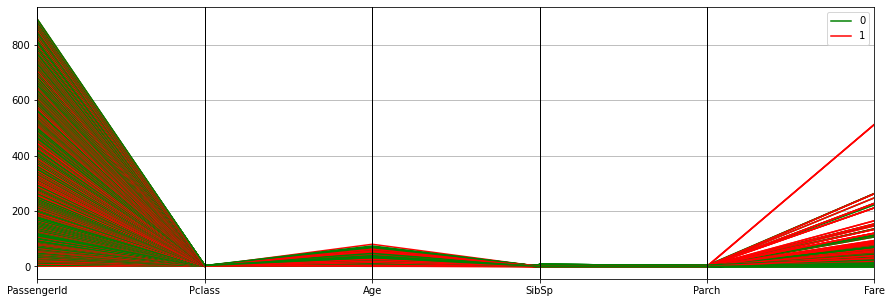

In [18]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
fig, ax = plt.subplots(figsize=(15, 5))
pd.plotting.parallel_coordinates(
    df[numerical_features], 'Survived',  ax=ax, color=['g', 'r'])

### Box plot for searchin outliers

Plot boxplots to have a better understanding of the distribution of features. A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. [https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51]


In [19]:
from IPython.display import Image
# from [https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51]
Image(url='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png', width=700)

- median (Q2/50th Percentile): the middle value of the dataset.

- first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

- third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

- interquartile range (IQR): 25th to the 75th percentile.

- whiskers (shown in blue)

- outliers (shown as green circles)

- “maximum”: Q3 + 1.5*IQR

- “minimum”: Q1 -1.5*IQR

<AxesSubplot:>

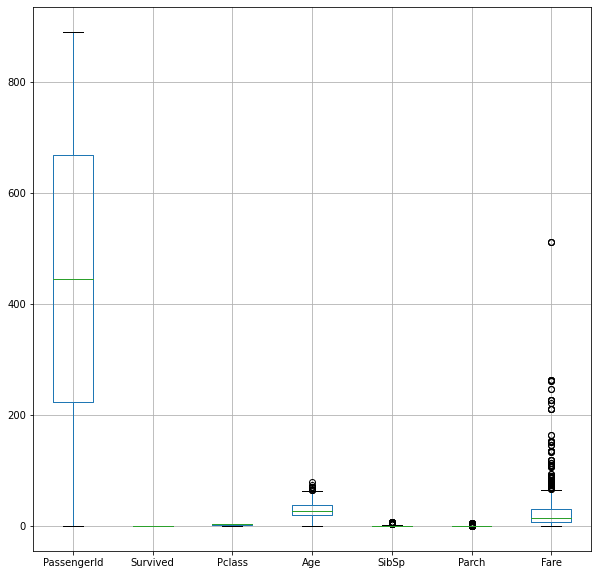

In [20]:
df.boxplot(figsize=(10, 10))

### Detect outliers

In [21]:
from collections import Counter
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns


def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c], 25)
        # 3rd quartile
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) |
                              (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers


Outliers_to_drop = detect_outliers(df, numerical_features)

In [22]:
# Outlier shape
df.loc[Outliers_to_drop].shape

(10, 12)

### Drop outliers

In [23]:
# Need to understand your data to know if outliers should be removed.
# Drop outliers
df = df.drop(Outliers_to_drop, axis=0).reset_index(drop=True)

### check_freq

In [24]:
def check_freq(df=df, percent=0.05):
    # show all categorical data and their frequency, you can control percentage of category. Default = 5%
    df_object_type = df.select_dtypes(include=['object', 'category'])
    for col in df_object_type.columns:
        label_freq = df_object_type[col].value_counts() / len(df_object_type)
        fig = label_freq.sort_values(ascending=False).plot.bar()
        fig.axhline(y=percent, color='red')
        fig.set_ylabel(f'Percentage of destination category of {col}')
        fig.set_xlabel('Destination')
        fig.set_title(f'{col} rare categories')
        plt.show()

In [25]:
#check_freq(df = df, percent = 0.05)

# Feature engineering
Feature engineering is the process of using domain knowledge to choose and transform the variables that will feed into your machine learning model. The process involves a combination of understanding the problem, data analysis, and applying good judgement. Feature Engineering is as much an art as it is a science.

Feature engineering happens prior to modeling, and is an essential part of building a machine learning solution. Appropriate well-designed features are often the deciding factor of the performance of your final algorithm. For this reason, data scientists often spend 70%-80% of their time on the pre-modelling phase, which largely consists of feature engineering.[https://zindi.africa/learn/what-is-feature-engineering-a-tutorial-from-mohamed-salem-jedidi]

## Create new column FamilySize

In [26]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

## Create new column Ticket_type

In [27]:
df['Ticket_type'] = df['Ticket'].apply(lambda x: x[0:3])
df['Ticket_type'] = df['Ticket_type'].astype('category')
df['Ticket_type'] = df['Ticket_type'].cat.codes

test['Ticket_type'] = test['Ticket'].apply(lambda x: x[0:3])
test['Ticket_type'] = test['Ticket_type'].astype('category')
test['Ticket_type'] = test['Ticket_type'].cat.codes

In [28]:
#segment and sort data values into 4 bins
df['CategoricalAge'] = pd.cut(df.Age, bins=4)
test['CategoricalAge'] = pd.cut(test.Age, bins=4)

In [29]:
# Show unique value
df.CategoricalAge.unique()

[(20.315, 40.21], NaN, (40.21, 60.105], (0.34, 20.315], (60.105, 80.0]]
Categories (4, interval[float64, right]): [(0.34, 20.315] < (20.315, 40.21] < (40.21, 60.105] < (60.105, 80.0]]

In [30]:
# Feature that tells whether a passenger had a cabin on the Titanic
df['Has_Cabin'] = df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

## Create new column Family_size_type

In [31]:
df["Family_size_type"] = ['smal' if i < 2 else 'big' for i in df["FamilySize"]]
test["Family_size_type"] = [
    'smal' if i < 2 else 'big' for i in test["FamilySize"]
]

In [32]:
# We may see female with small famaly have more probability to survive
df.pivot_table(index='Sex',
               columns='Family_size_type',
               values='Survived',
               aggfunc='mean',
               margins=True)

Family_size_type,big,smal,All
Sex,,,
female,0.721311,0.785714,0.747573
male,0.279503,0.155718,0.190559
All,0.514535,0.303538,0.385925


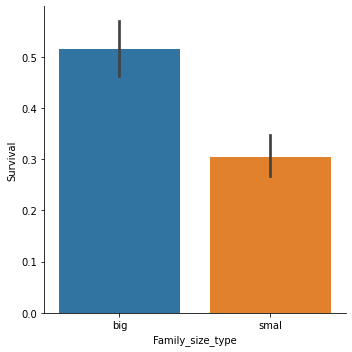

In [33]:
g = sns.catplot(x="Family_size_type", y="Survived", data=df, kind="bar")
g.set_ylabels("Survival")
plt.show()

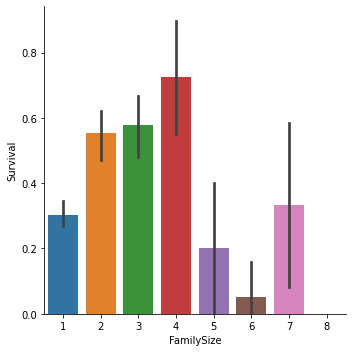

In [34]:
g = sns.catplot(x="FamilySize", y="Survived", data=df, kind="bar")
g.set_ylabels("Survival")
plt.show()

## Person title

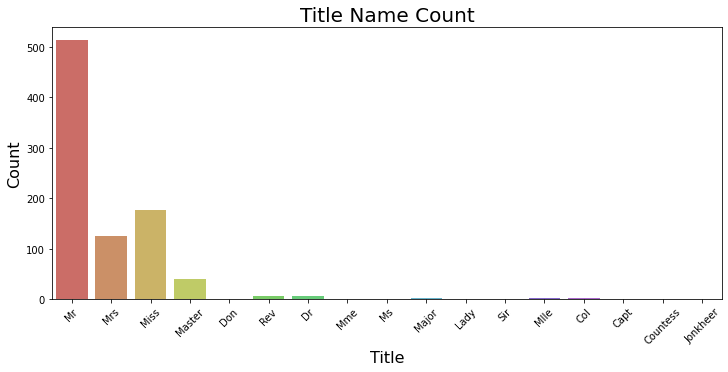

In [35]:
# from https://www.kaggle.com/code/kabure/titanic-eda-model-pipeline-keras-nn
import re
# GettingLooking the prefix of all Passengers
df['Title'] = df.Name.apply(
    lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

# defining the figure size of our graphic
plt.figure(figsize=(12, 5))

# Plotting the result
sns.countplot(x='Title', data=df, palette="hls")
plt.xlabel("Title", fontsize=16)  # seting the xtitle and size
plt.ylabel("Count", fontsize=16)  # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

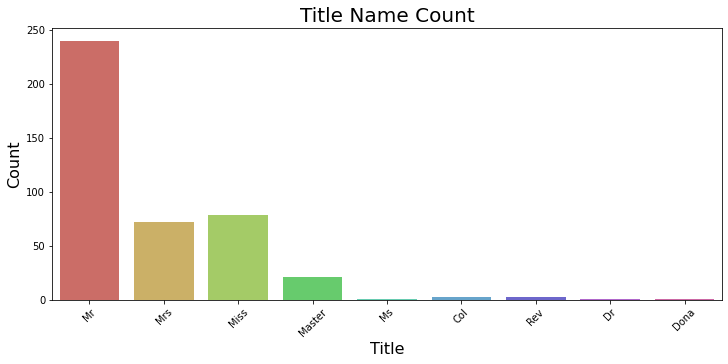

In [36]:
# from https://www.kaggle.com/code/kabure/titanic-eda-model-pipeline-keras-nn
import re
# GettingLooking the prefix of all Passengers
test['Title'] = test.Name.apply(
    lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

# defining the figure size of our graphic
plt.figure(figsize=(12, 5))

# Plotting the result
sns.countplot(x='Title', data=test, palette="hls")
plt.xlabel("Title", fontsize=16)  # seting the xtitle and size
plt.ylabel("Count", fontsize=16)  # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [37]:
# Social identify of each title

Title_Dictionary = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir":       "Royalty",
    "the Countess": "Royalty",
    "Dona":       "Royalty",
    "Lady":      "Royalty",
    "Mme":        "Mrs",
    "Ms":         "Mrs",
    "Mrs":       "Mrs",
    "Mlle":       "Miss",
    "Miss":      "Miss",
    "Mr":        "Mr",
    "Master":    "Master"
}

# map each title to correct category
df['Title'] = df.Title.map(Title_Dictionary)
df['Title'] = df.Title.map(Title_Dictionary)

In [38]:
# map each title to correct category
test['Title'] = test.Title.map(Title_Dictionary)
test['Title'] = test.Title.map(Title_Dictionary)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       881 non-null    int64   
 1   Survived          881 non-null    int64   
 2   Pclass            881 non-null    int64   
 3   Name              881 non-null    object  
 4   Sex               881 non-null    object  
 5   Age               711 non-null    float64 
 6   SibSp             881 non-null    int64   
 7   Parch             881 non-null    int64   
 8   Ticket            881 non-null    object  
 9   Fare              881 non-null    float64 
 10  Cabin             201 non-null    object  
 11  Embarked          879 non-null    object  
 12  FamilySize        881 non-null    int64   
 13  Ticket_type       881 non-null    int16   
 14  CategoricalAge    711 non-null    category
 15  Has_Cabin         881 non-null    int64   
 16  Family_size_type  881 non-

## Create new column IsAlone

In [40]:
df["IsAlone"] = [1 if i == 1 else 0 for i in df["FamilySize"]]
test["IsAlone"] = [1 if i == 1 else 0 for i in test["FamilySize"]]

## Create new column FareBin

In [41]:
# segment and sort data values into 4 bins
df['FareBin'] = pd.qcut(df['Fare'], 4)
test['FareBin'] = pd.qcut(test['Fare'], 4)

In [42]:
# check
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       418 non-null    int64   
 1   Pclass            418 non-null    int64   
 2   Name              418 non-null    object  
 3   Sex               418 non-null    object  
 4   Age               332 non-null    float64 
 5   SibSp             418 non-null    int64   
 6   Parch             418 non-null    int64   
 7   Ticket            418 non-null    object  
 8   Fare              417 non-null    float64 
 9   Cabin             91 non-null     object  
 10  Embarked          418 non-null    object  
 11  FamilySize        418 non-null    int64   
 12  Ticket_type       418 non-null    int8    
 13  CategoricalAge    332 non-null    category
 14  Has_Cabin         418 non-null    int64   
 15  Family_size_type  418 non-null    object  
 16  Title             412 non-

# Data split

In [43]:
X = df.copy(deep=True)
X = X.drop(['Survived', 'Name', 'PassengerId', 'IsAlone'], axis=1)
y = df.copy(deep=True)
y = y.Survived
# I hear boolean type better than the numerical type. Because computer can  understand it better
y = y.astype('bool')

In [44]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5)

train_index, val_index = next(iter(kf.split(X, y)))
X_train, X_test = X.iloc[train_index], X.iloc[val_index]
y_train, y_test = y.iloc[train_index], y.iloc[val_index]

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((704, 16), (177, 16), (704,), (177,))

In [46]:
# Observe y_train we can see that data is imbalanced
from collections import Counter
couter = Counter(y_train)
for k, v in couter.items():
    dist = v / len(y_train) * 100
    print(f'(Class={k}, n={v}, {dist}% )')

(Class=False, n=432, 61.36363636363637% )
(Class=True, n=272, 38.63636363636363% )


In [47]:
# Same here in y_test
from collections import Counter
couter = Counter(y_test)
for k, v in couter.items():
    dist = v / len(y_test) * 100
    print(f'(Class={k}, n={v}, {dist}% )')

(Class=False, n=109, 61.5819209039548% )
(Class=True, n=68, 38.4180790960452% )


# Initiate classes

## DataFrameMapper

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from feature_engine.encoding import RareLabelEncoder


class DataFramePreprocessing(TransformerMixin, BaseEstimator):
    '''DataFramePreprocessing class fit and transform all feature and return Pandas Dataframe'''
    def __init__(self):
        pass

    # Find all categorical features. Find features with <= 7 unique value
    def categorical_features(self):
        return [
            col for col in X.select_dtypes(include=['object']).columns
            if len(X[col].unique()) <= 7
        ]

    # Find all ordinal features. Find features with > 7 unique value
    def ordinal_features(self):
        return [
            col for col in X.select_dtypes(include=['object']).columns
            if len(X[col].unique()) > 7
        ]

    # Find all numerical features.
    def numerical_features(self):
        return X.select_dtypes(include=['int64', 'float64']).columns

    # Find all boolean features.
    def boolean_features(self):
        return X.select_dtypes(include=['bool']).columns

    # Use SimpleImputer, RareLabelEncoder, and  OneHotEncoder for all categorical features.
    # The RareLabelEncoder() groups rare or infrequent categories in
    # a new category called "Rare", or any other name entered by the user. By default 5%
    def cat(self):
        return [([c], [
            SimpleImputer(strategy='most_frequent'),
            RareLabelEncoder(),
            OneHotEncoder(sparse=False, handle_unknown='ignore')
        ]) for c in self.categorical_features()]

    # Use SimpleImputer and OrdinalEncoder for all ordinal features
    def ordin(self):
        from sklearn.preprocessing import OrdinalEncoder
        return [([o], [
            SimpleImputer(strategy='most_frequent'),
            OrdinalEncoder(handle_unknown="use_encoded_value",
                           unknown_value=-999)
        ]) for o in self.ordinal_features()]

    # Use SimpleImputer and OneHotEncoder for all boolean features
    def boolean(self):
        return [([b], [
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder(sparse=False, handle_unknown='error')
        ]) for b in self.boolean_features()]

    # Use SimpleImputer and RobustScaler for all numerical features
    def num(self):
        from sklearn.preprocessing import MinMaxScaler
        return [([n], [
            SimpleImputer(strategy='median'),
            StandardScaler(with_mean=False, with_std=False)
        ]) for n in self.numerical_features()]

    # Mapper transform all feature and return Pandas DataFrame
    def mapper(self):
        from sklearn_pandas import DataFrameMapper
        return DataFrameMapper(self.num() + self.cat() + self.ordin() +
                               self.boolean(),
                               df_out=True)

    # Fit
    def fit(self, X, y=None):
        # Standart fitter, recomended use Pandas DataFrame
        X = check_array(X, accept_sparse=False)

        self.n_features_in_ = X.shape[1]
        self.n_features_ = X.shape[1]
        self.is_fitted_ = True

        return self

    # Transform
    def transform(self, X):
        # Standart transform
        check_is_fitted(self, ['is_fitted_'])

        X = check_array(X, accept_sparse=True)

        if X.shape[1] != self.n_features_:
            raise ValueError(
                'Shape of input is different from what was seen in `fit`')
        return self

## CustomClassifiere

In [49]:
from imblearn import FunctionSampler
from sklearn.experimental import enable_halving_search_cv
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_array, check_is_fitted
from imblearn.pipeline import Pipeline
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.ensemble import BaggingClassifier


class CustomClassifier(ClassifierMixin, BaseEstimator):
    '''this my first CustomClassifier
    Custom Classifier have 1 goal give a good pipeline with hyperparameters tuning.
    Hyperparameters to tune as a part of the fit() function and not the constructor.
    Template from https://learn-scikit.oneoffcoder.com/customized-estimators.html'''
    
    param_grid = None

    def __init__(self, base_estimator, scaler=None):
        # base_estimator model
        self.base_estimator = base_estimator
        self.scaler = scaler

    def set_base_estimator(self, base_estimator):
        self.base_estimator = base_estimator
        return self

    def __get_pipeline(self):
        scal = self.scaler
        classifier = self.base_estimator
        
        steps = ([
            ('scaler', scal), #My CustomTransformer DataFrame. 
            ('select', SelectPercentile()), # I check all feature selectors from sklearn and this is my favorit
            ('smote', SMOTE(random_state=0, n_jobs=-1)),
            ('model',
             BaggingClassifier(
                 base_estimator=classifier,
                 bootstrap_features=True,
                 n_jobs=-1,
                 random_state=0,
             )),
        ])

        pipeline = Pipeline(steps=steps)
        return pipeline

    def __get_model(self):
        if self.param_grid is None:
            return self.__get_pipeline()
        model = HalvingGridSearchCV(
            **{
                'estimator': self.__get_pipeline(),
                'cv': self.cv,
                'param_grid': self.param_grid,
                'scoring': 'neg_brier_score',
                'n_jobs': -1,
                'random_state': 0,
                'factor': 2,
            })
        return model

    def predict_proba(self, X):
        check_is_fitted(self, 'is_fitted_')

        return self.model_.predict_proba(X)

    def set_param_grid(self, param_grid=None):
        self.param_grid = param_grid
        return self

    def set_cv(self, cv=5):
        self.cv = cv
        return self

    def set_scaler(self, scaler):
        self.scaler = scaler
        return self.scaler

    def fit(self, X, y, *args, **kwargs):
        if y is None:
            raise ValueError(
                'requires y to be passed, but the target y is None')

        self.is_fitted_ = True
        self.n_features_in_ = X.shape[1]

        self.model_ = self.__get_model()

        self.model_.fit(X, y)

        return self

    def predict(self, X):
        check_is_fitted(self, 'is_fitted_')
        X = check_array(X)

        return self.model_.predict(X)

# Param Grid

In [50]:
# Here you can use anything that you want to tune
# lgbm_param_grid = {
#     'select__percentile': np.arange(2, 45, 1),
#     'smote__k_neighbors': np.arange(5, 13, 1),
#     # Belong to BaggingClassifier
#     'model__n_estimators': np.arange(20, 31, 1),
#     # Belong to LGBMClassifier
#     'model__base_estimator__max_depth': np.arange(5, 13, 1),
# }

In [51]:
lgbm_param_grid = {
    'select__percentile': [38],
    'smote__k_neighbors': [5],
    # Belong to BaggingClassifier
    'model__n_estimators': [30],
    # Belong to LGBMClassifier
    'model__base_estimator__max_depth': [9],    
}

In [52]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report


def evaluate(estimator, X_train, y_train, X_test, y_test):

    # Accuracy for X_train and y_train
    score_train = estimator.score(X_train, y_train)
    print(f'(Accuracy for score(X_train,y_train) {score_train})\n')

    # Accuracy for X_test and y_test

    score_test = estimator.score(X_test, y_test)
    print(f'(Accuracy for score(X_test,y_test) {score_test})\n')

    # Prediction on Testing Data
    y_pred = estimator.predict(X_test)

    # Accuracy for y_test and y_pred
    classifier_accuracy_score = accuracy_score(y_test, y_pred)
    print("Accuracy Score:\n", classifier_accuracy_score, "\n")

    # Accuracy for y_test and y_pred
    classifier_accuracy_score = balanced_accuracy_score(y_test, y_pred)
    print("Balanced Accuracy Score:\n", classifier_accuracy_score, "\n")

    # Confusion Matrix
    conf_mtx = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_mtx, "\n")

    # Classification Report
    class_rep = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_rep, "\n")

In [53]:
from sklearn.metrics import precision_recall_curve, roc_curve


def visual(estimator, X_test, y_test):
    # Precision - Recall Curve
    yhat = estimator.predict_proba(X_test)
    precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
    plt.figure(dpi=100, figsize=(15, 6))
    plt.subplot(121)
    sns.lineplot([0, 1], [1, 0], linestyle='--', label='No Skill')
    sns.lineplot(recall, precision, marker='.', label='skill')
    plt.title("Recall vs Precision Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    # ROC Curve
    plt.subplot(122)
    sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
    fpr, tpr, _ = roc_curve(y_test, yhat[:, 1])
    sns.lineplot(fpr, tpr, marker='.', label='Skill')
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Calibrate curve
    plt.subplot()
    from sklearn.calibration import calibration_curve
    sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
    fop, mpv = calibration_curve(y_test, yhat[:, 1], n_bins=10)
    sns.lineplot(fop, mpv, marker='.', label='Skill')
    plt.title("Calibrate curve")
    plt.legend()
    plt.show()

In the context of binary classification, calibration refers to the process of transforming the output scores from a binary classifier to class probabilities. If we think of the classifier as a “black box” that transforms input data into a score, we can think of calibration as a post-processing step that converts the score into a probability of the observation belonging to class 1.

source: https://statisticaloddsandends.wordpress.com/2020/10/07/what-is-calibration/

In [54]:
from IPython.display import Image

Image(
    url=
    'https://statisticaloddsandends.files.wordpress.com/2020/10/pipeline.png?w=768&h=86',
    width=700)

In [55]:
from sklearn.calibration import CalibratedClassifierCV


def calibration(estimator, X_train, y_train, method='sigmoid'):
    calibration = CalibratedClassifierCV(base_estimator=estimator.model_,
                                         n_jobs=-1,
                                         cv='prefit',
                                         method=method)
    calibration.fit(X_train, y_train)
    return calibration

In [56]:
def brier_score(estimator, X_test, y_test):
    from sklearn.metrics import brier_score_loss
    yhat = estimator.predict_proba(X_test)
    print(f'brier_score_loss = {brier_score_loss(y_test, yhat[:, 1])}')

In [57]:
def full_evaluate(estimator, X_train, y_train, X_test, y_test):
    evaluate(estimator, X_train, y_train, X_test, y_test)
    brier_score(estimator, X_test, y_test)
    visual(estimator, X_test, y_test)

# Modeling

In [58]:
def modeling(estimator, param_grid=None):
    estimator = CustomClassifier(estimator)
    if param_grid == None:
        pass
    else:
        estimator.set_param_grid(param_grid)

    estimator.set_scaler(DataFramePreprocessing().mapper())

    estimator.set_cv(cv=kf)
    return estimator

In [59]:
def full_evaluate_fit(estimator):
    estimator.fit(X_train, y_train)
    try:
        print(estimator.model_.best_params_)
    except:
        pass
    cal = calibration(estimator, X_train, y_train, method='isotonic')
    cal_sig = calibration(estimator, X_train, y_train)
    print('full_evaluate(estimator.model_)')
    full_evaluate(estimator.model_, X_train, y_train, X_test, y_test)
    print('full_evaluate(cal)')
    full_evaluate(cal, X_train, y_train, X_test, y_test)
    print('full_evaluate(cal_sig)')
    full_evaluate(cal_sig, X_train, y_train, X_test, y_test)
    return estimator, cal, cal_sig

In [60]:
estimator = modeling(
    LGBMClassifier(
        boosting_type='dart',
        n_jobs=-1,
        random_state=0,
        class_weight='balanced',
    ), lgbm_param_grid)

In [61]:
mapper = DataFramePreprocessing().mapper()

#X_train_mapped= mapper.fit_transform(X_train)

# Evaluate

{'model__base_estimator__max_depth': 9, 'model__n_estimators': 30, 'select__percentile': 38, 'smote__k_neighbors': 5}
full_evaluate(estimator.model_)
(Accuracy for score(X_train,y_train) -0.11546423982008766)

(Accuracy for score(X_test,y_test) -0.1435881504949276)

Accuracy Score:
 0.7909604519774012 

Balanced Accuracy Score:
 0.783256880733945 

Confusion Matrix:
 [[89 20]
 [17 51]] 

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.82      0.83       109
        True       0.72      0.75      0.73        68

    accuracy                           0.79       177
   macro avg       0.78      0.78      0.78       177
weighted avg       0.79      0.79      0.79       177
 

brier_score_loss = 0.1435881504949276


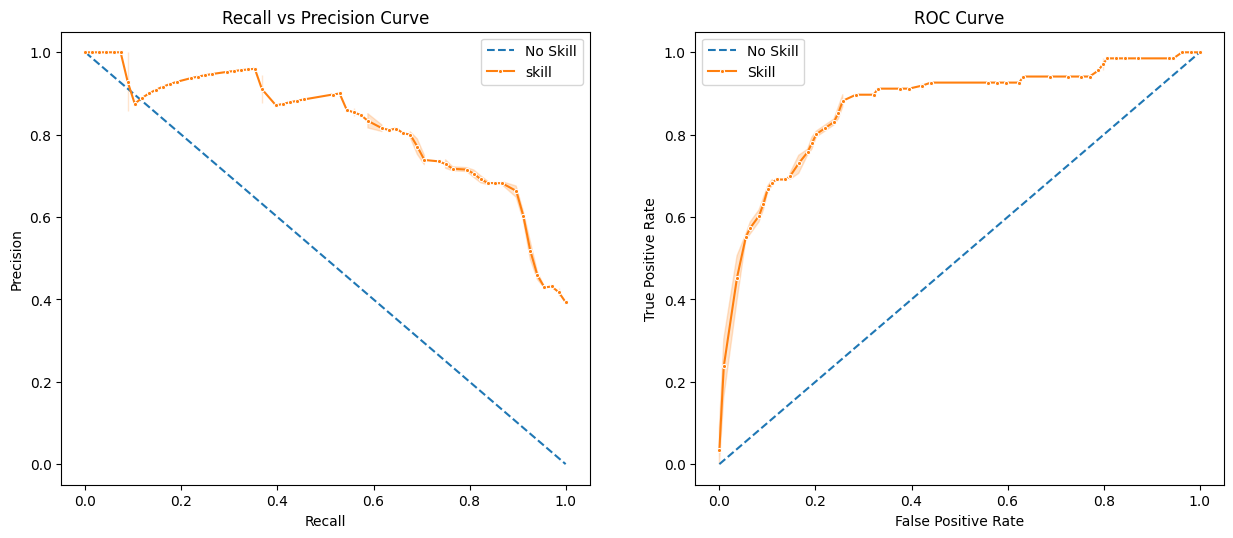

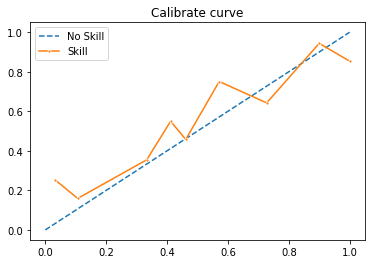

full_evaluate(cal)
(Accuracy for score(X_train,y_train) 0.8636363636363636)

(Accuracy for score(X_test,y_test) 0.807909604519774)

Accuracy Score:
 0.807909604519774 

Balanced Accuracy Score:
 0.783189422558014 

Confusion Matrix:
 [[97 12]
 [22 46]] 

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.89      0.85       109
        True       0.79      0.68      0.73        68

    accuracy                           0.81       177
   macro avg       0.80      0.78      0.79       177
weighted avg       0.81      0.81      0.80       177
 

brier_score_loss = 0.1383548095040597


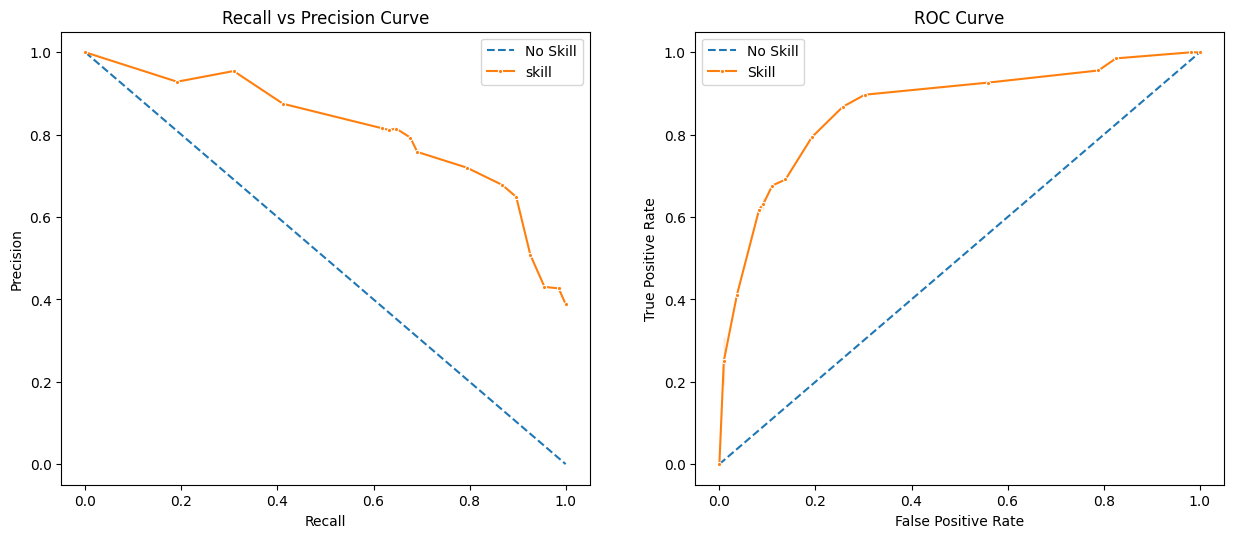

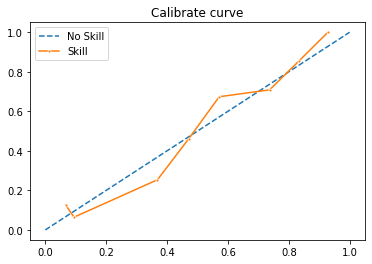

full_evaluate(cal_sig)
(Accuracy for score(X_train,y_train) 0.8565340909090909)

(Accuracy for score(X_test,y_test) 0.7966101694915254)

Accuracy Score:
 0.7966101694915254 

Balanced Accuracy Score:
 0.78507825148408 

Confusion Matrix:
 [[91 18]
 [18 50]] 

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.83      0.83       109
        True       0.74      0.74      0.74        68

    accuracy                           0.80       177
   macro avg       0.79      0.79      0.79       177
weighted avg       0.80      0.80      0.80       177
 

brier_score_loss = 0.13670581885289068


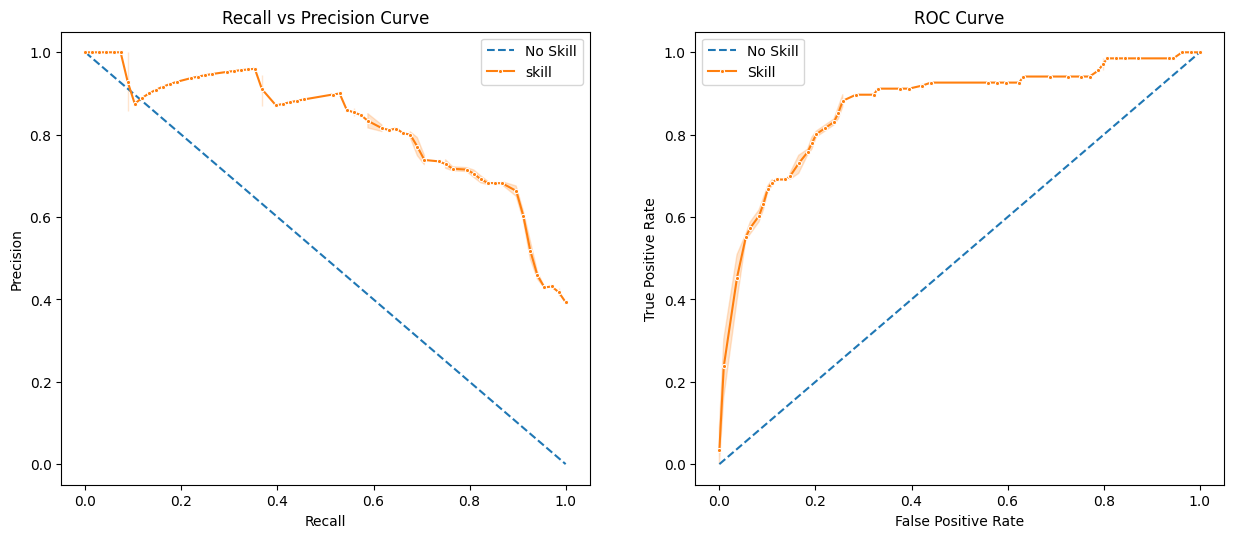

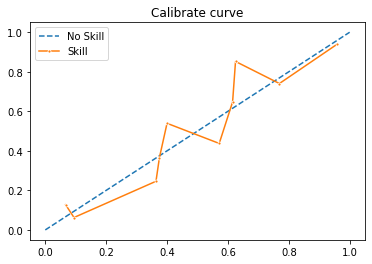

In [62]:
model, model_calib, model_calib_sig = full_evaluate_fit(estimator)

In [63]:
y_preds = model_calib.predict(test)
sub = pd.DataFrame()
sub['PassengerId']=test.PassengerId
sub['Survived'] = y_preds.astype(int)
sub.to_csv('submission.csv', index=False)

In [64]:
res = pd.read_csv('submission.csv')

Text(0.5, 1.0, 'Prediction distribution')

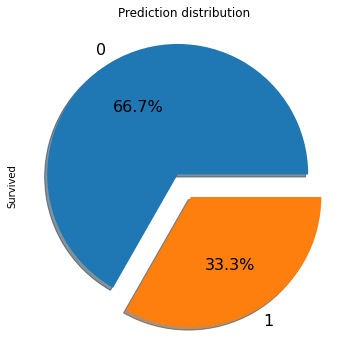

In [65]:
plt.figure(figsize=(6,6))
res['Survived'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")